In [2]:
!pip install rioxarray
!pip install earthpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 39.5 MB/s eta 0:00:00


In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import mapping
import rioxarray as rxr
import xarray as xr
import geopandas as gpd

import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5)

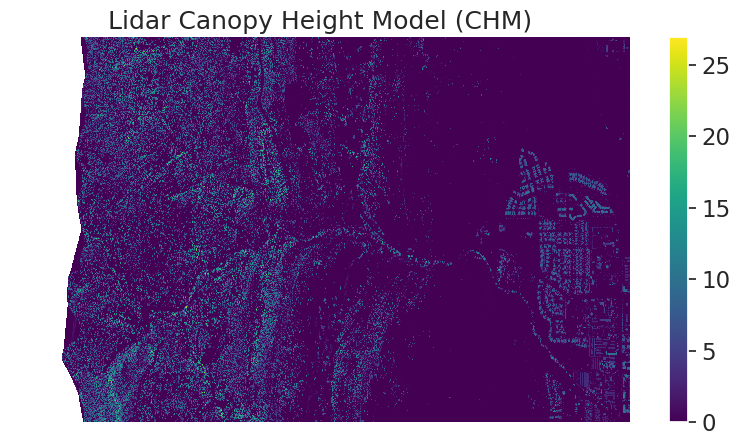

In [4]:
lidar_chm_im = rxr.open_rasterio("/content/drive/MyDrive/python open source spatial programming and remote sensing/spatial/boulder-leehill-rd/outputs/lidar_chm.tif",
                                 masked=True).squeeze()

f, ax = plt.subplots(figsize=(10, 5))
lidar_chm_im.plot.imshow()
ax.set(title="Lidar Canopy Height Model (CHM)")

ax.set_axis_off()
plt.show()

In [6]:
crop_extent = gpd.read_file('/content/drive/MyDrive/python open source spatial programming and remote sensing/spatial/boulder-leehill-rd/clip-extent.shp')

In [7]:
print('crs of  lidar_chm_im', lidar_chm_im.rio.crs)
print('crs of  crop_extent', crop_extent.crs)

crs of  lidar_chm_im EPSG:32613
crs of  crop_extent EPSG:32613


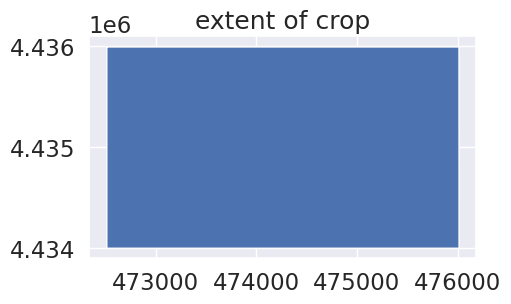

In [10]:
fig , ax= plt.subplots(figsize=(5,5))
crop_extent.plot(ax=ax)
ax.set(title='extent of crop')
plt.show()

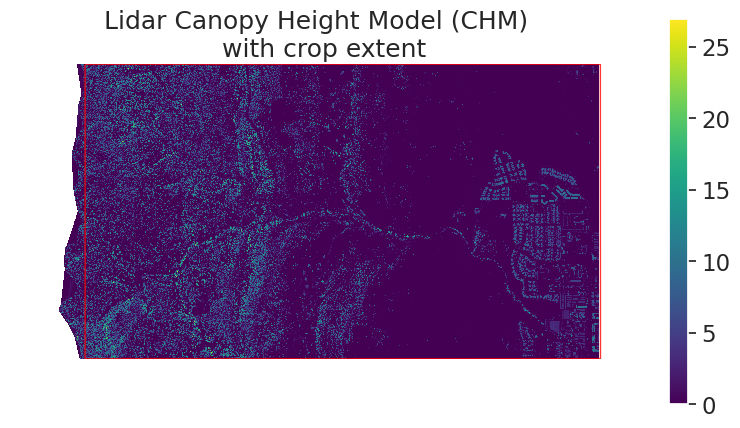

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
lidar_chm_im.plot.imshow(ax=ax)
crop_extent.plot(ax=ax, facecolor='none', edgecolor='red', alpha=.8)
ax.set(title="Lidar Canopy Height Model (CHM) \n with crop extent")
ax.set_axis_off()
plt.show()

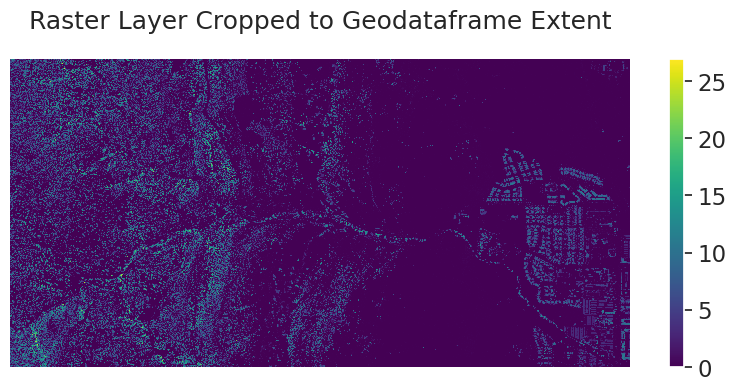

In [16]:
lidar_clipped = lidar_chm_im.rio.clip(crop_extent.geometry.apply(mapping),
                                      # This is needed if your GDF is in a diff CRS than the raster data
                                      crop_extent.crs)

f, ax = plt.subplots(figsize=(10, 4))
lidar_clipped.plot(ax=ax)
ax.set(title="Raster Layer Cropped to Geodataframe Extent")
ax.set_axis_off()
plt.show()